# Applying different model types
The previous two notebooks used linear models, which are as simple as they get. However, in most situations, linear models will not give the best performance. These are usually surpassed by models such as support vector machines, and tree based models such as LightGBM.

As sklearn-compatible models usually have similar named funtions, it is straightforward to compare them and to plug in the model that best suits your case.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/chl_regression_tutorial.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

features = ['rho_443_a', 'rho_492_a', 'rho_560_a', 'rho_665_a', 'rho_704_a', 'rho_740_a', 'rho_783_a', 'rho_865_a']
target = 'CHL'

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

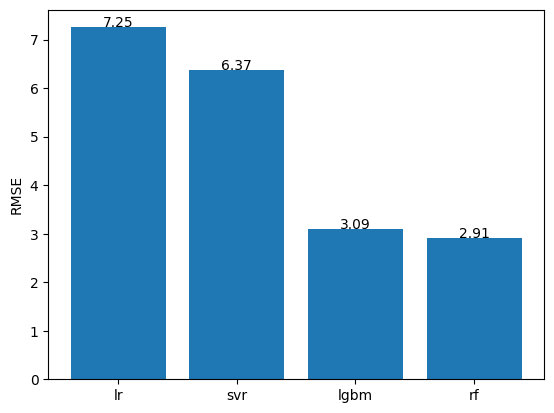

In [9]:
# Import models such as support vector machines, lightgbm, random forest, etc.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr = LinearRegression()
svr = SVR()
lgbm = LGBMRegressor(verbose=-1)
rf = RandomForestRegressor()

model_dict = {'lr': lr, 'svr': svr, 'lgbm': lgbm, 'rf': rf}
model_scores = {}

for model_name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_scores[model_name] = mse

# bar chart of model scores

plt.bar(model_scores.keys(), model_scores.values())
plt.ylabel('RMSE')
# show the values on top of the bars
for i, v in enumerate(model_scores.values()):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')
plt.show()

